## Circumplanetary Disk - Create a Simple Mock Model

In [2]:
import numpy as np 


In [3]:
# Hill's radius for HD 169142 b CPD:
from astropy.constants import M_sun, L_sun, R_sun, au, pc, G, M_jup

def disk_hill_radius(a, m, M):
    "a: semi-major axis, m: mass of the planet, M: mass of the star"
    Hill = a * (m / (3 * M))**(1/3)
    CPD_r_out = (0.3 * Hill).to('au')
    #err_Hill
    return CPD_r_out


HD168142b_r_out = disk_hill_radius(37.2*au, 3*M_jup, 1.65 * M_sun)
print(HD168142b_r_out)

phi_manual = np.arctan(2.5/37.2)
print(phi_manual)


0.9299133490495572 AU
0.0671034001207876


phi_max: 0.0671034001207876
pp min: 0.015707963267948967, pp max: 6.267477343911637
Indices of True values in mask_phi: (array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64), array([ 0,  0,  0, ..., 31, 31, 31], dtype=int64), array([  0,   1, 198, ...,   1, 198, 199], dtype=int64))
Total number of True values in mask_phi: 12800
Total number of data points in pp: 640000


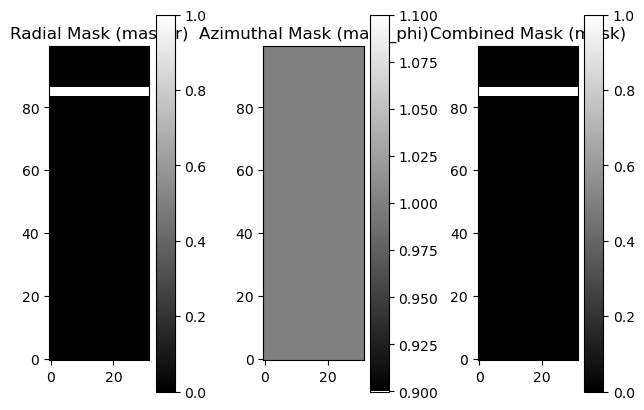

In [4]:
import numpy as np
# Reference files from radmc3d-2.0/examples/run_ppdisk_simple_1/problem_setup.py

# Make some plots in between to visualize the grid and density distribution

# Import some astronomical constants
from astropy.constants import M_sun, L_sun, R_sun, au, pc, G, M_jup, R_jup
from astropy.units import K, g, cm


# Convert constants to cgs units
au = au.cgs.value     # Astronomical Unit       [cm]
pc = pc.cgs.value     # Parsec                  [cm]
M_sun = M_sun.cgs.value  # Solar mass              [g]
T_sun = 3000      # Solar temperature       [K]
L_sun = L_sun.cgs.value  # Solar luminosity        [erg/s]
R_sun = R_sun.cgs.value  # Solar radius            [cm]
M_jup = M_jup.cgs.value  # Jupiter mass            [g]
R_jup = R_jup.cgs.value  # Jupiter radius          [cm]   




# Define the parameters of the model

    # radmc3d.inp parameter : main settings for RADMC-3D
nphot    = 1000000  #for the thermal monte carto simulation
#multiple CPU cores, may need cluster

    # Grid : defines layout of space

nr       = 100 
ntheta   = 32
nphi     = 200


# Radius for PPD not CPD
# r:  inner CPD (0.2 au to 2.2 au) , gap (2.2 au to 26 au) , outer dust ring (26 au to 90 au)
# (Poblette et al 2022), but doesnt include the inner CPD rim, prob need calculagte truncation radius from star mass
# CPD locates 37.2 au away from star (r = 37.2 )
r_in      = 0.2*au   # 3 times Jupyter radius
r_out     = 90*au 

theta_up  = np.pi*0.5 - 0.7e0  
        # Coordinate array

r_i       = np.logspace(np.log10(r_in),np.log10(r_out),nr+1)  #+1 because it is not counting cell centers, but the walls
theta_i   = np.linspace(theta_up,0.5e0*np.pi,ntheta+1)  # theta goes to pi/2 lets z starts from zero 
phi_i     = np.linspace(0.e0,np.pi*2.e0,nphi+1)

        # Cell center position array
r_c = 0.5*(r_i[0:nr]+r_i[1:nr+1])  # average of the cell wall x-pos and cell wall x+1 pos for each cell in the array
theta_c = 0.5*(theta_i[0:ntheta]+theta_i[1:ntheta+1])
phi_c = 0.5*(phi_i[0:nphi]+phi_i[1:nphi+1])


        # Make the grid
            # takes in the center positions of the cells and returns a 3D matrix of the grid
            # indexing='ij' means that the first two indices of the 3D matrix are the r and theta coordinates
qq       = np.meshgrid(r_c,theta_c,phi_c,indexing='ij')
            # Extract the coordinates (r,theta, z) from the 3D matrix
rr       = qq[0]  # final r coor defined by cell center
tt       = qq[1] # final theta coor defined by cell center, just for defining zr
pp       = qq[2]
zr       = np.pi/2.e0 - qq[1]    # z = pi/2 - theta, essentially frame rotated by 90 degrees, and z is from 0 to 0.7 radians


    # Density: dust values (for each species) for each cell in the grid
                                                                                                                                                             
        # number of dust species
ndustspec = 2


sigmag0  = 1e3               # Sigma gas at 1 AU
sigmad0  = sigmag0 * 0.01    # Sigma dust at 1 AU
fracbig  = 0.99              # Fraction of dust that is the big grain dust
plsig    = -1.0e0            # Powerlaw of the surface density
hr0      = 0.05              # H_p/r at 1 AU
plh      = 0.1               # Powerlaw of flaring
hrbigsett= 0.02              # The big grains are settled a bit more than the small grains
        # dust density function

sigmad   = sigmad0 * (rr/au)**plsig
sigmadsm = sigmad*(1.-fracbig)
sigmadbg = sigmad*fracbig
hhrsm    = hr0 * (rr/au)**plh
hhrbg    = hrbigsett * (rr/au)**plh
hhsm     = hhrsm * rr
hhbg     = hhrbg * rr
rhodsm   = ( sigmadsm / (np.sqrt(2.e0*np.pi)*hhsm) ) * np.exp(-(zr**2/hhrsm**2)/2.e0)
rhodbg   = ( sigmadbg / (np.sqrt(2.e0*np.pi)*hhbg) ) * np.exp(-(zr**2/hhrbg**2)/2.e0)




#CPD parameters
#sigma_g0 =  10**3 #(g/cm**2)   # gas surface density at 1 au
sigmad02 = 0.01*10**3 #(g/cm**2) #g/cm^2 # dust surface density at 1 au
plsig2 = -1.5# power law index for the dust surface density
plh2  = 1.15 # power law index for the dust scale height
hr02 = 0.1
hrbigsett2 =0.05

# Make the dust density model for CPD
#
sigmad2  = sigmad02 * (rr/au)**plsig2
sigmadsm2 = sigmad2*(1.-fracbig)
sigmadbg2 = sigmad2*fracbig
hhrsm2    = hr02 *(rr/au)**plh2
hhrbg2    = hrbigsett2 * (rr/au)**plh2
hhsm2     = hhrsm2 * rr
hhbg2     = hhrbg2 * rr
rhodsm2   = ( sigmadsm2 / (np.sqrt(2.e0*np.pi)*hhsm2) ) * np.exp(-(zr**2/hhrsm2**2)/2.e0)
rhodbg2   = ( sigmadbg2 / (np.sqrt(2.e0*np.pi)*hhbg2) ) * np.exp(-(zr**2/hhrbg2**2)/2.e0)

# Define the radial range for the CPD
r_min = 34.7 * au  # Inner radius of the CPD region
r_max = 39.7 * au  # Outer radius of the CPD region
phi_max = np.arctan(2.5/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max
print(f'phi_max: {phi_max}')
# Create a mask for the specified range of rr
mask_r = (rr >= r_min) & (rr <= r_max)
mask_phi = (pp >= 0) & (pp <= phi_max) | (pp >= phi_min) & (pp <= 2*np.pi) #or operator

#mask_phi = (pp >= 0) & (pp <= np.pi)
print(f'pp min: {np.min(pp)}, pp max: {np.max(pp)}')
indices_mask_phi = np.where(mask_phi)
print(f'Indices of True values in mask_phi: {indices_mask_phi}')
mask = mask_r & mask_phi

#Print the fraction of data points in the phi mask true compare to total data points of the phi grid, it should be small
print(f'Total number of True values in mask_phi: {np.sum(mask_phi)}')
print(f'Total number of data points in pp: {pp.size}')


import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(mask_r[:, :, 0], cmap='gray', origin='lower')
plt.title('Radial Mask (mask_r)')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(mask_phi[:, :, 0], cmap='gray', origin='lower')
plt.title('Azimuthal Mask (mask_phi)')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(mask[:, :, 0], cmap='gray', origin='lower')
plt.title('Combined Mask (mask)')
plt.colorbar()

plt.tight_layout()
plt.show()




The shape of r_shifted is (384,)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_18236\4112898687.py:33: RuntimeWarning: divide by zero encountered in log10
  plt.plot(rr.flatten(), np.log10(rhodbg.flatten()),'.', label='Small Dust Density (rhodsm)')


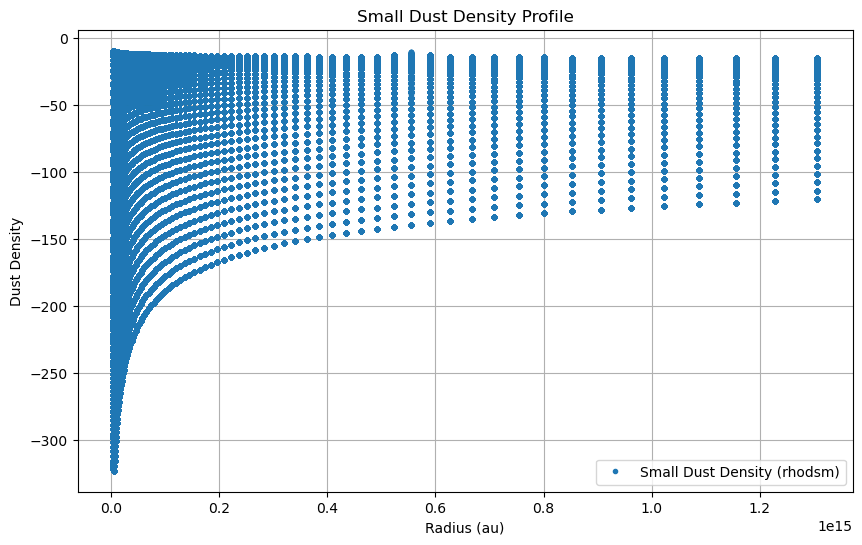

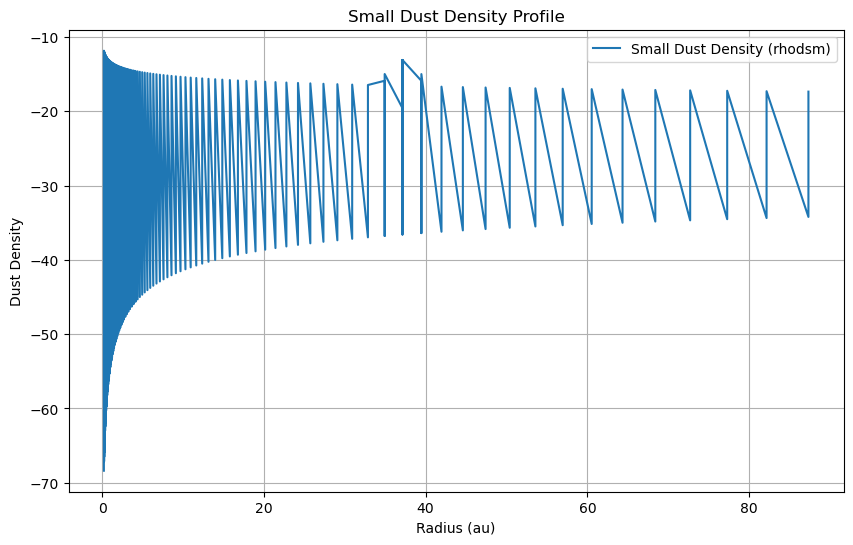

In [5]:
# Extract the masked radial values
r_masked = rr[mask]
pp_masked = pp[mask]

# Define the midpoint of the CPD region
r_mid = 37.2*au # Midpoint of the radial range

# Shift the radial array by the midpoint and take the positive values



r_shifted = np.sqrt(r_masked**2 + r_mid**2 - 2*r_masked*r_mid*np.cos(pp_masked))

print(f'The shape of r_shifted is {np.shape(r_shifted)}')
# Update the density model within the specified range
# Apply the shifted and positive radial values
# ongoing discussion about shape (Sun etal 2024)
sigmad[mask] += sigmad02 * (r_shifted / au) ** plsig2
sigmadsm[mask] = sigmad[mask] * (1. - fracbig)
sigmadbg[mask] = sigmad[mask] * fracbig
hhrsm[mask] += hr02 * (r_shifted / au) ** plh2
hhrbg[mask] += hrbigsett2 * (r_shifted / au) ** plh2
hhsm[mask] = hhrsm[mask] * r_shifted
hhbg[mask] = hhrbg[mask] * r_shifted
rhodsm[mask] = (sigmadsm[mask] / (np.sqrt(2.e0 * np.pi) * hhsm[mask])) * np.exp(-(zr[mask] ** 2 / hhrsm[mask] ** 2) / 2.e0)
rhodbg[mask] = (sigmadbg[mask] / (np.sqrt(2.e0 * np.pi) * hhbg[mask])) * np.exp(-(zr[mask] ** 2 / hhrbg[mask] ** 2) / 2.e0)



import matplotlib.pyplot as plt
def plot_small_dust_density_CPD(r_shifted, rhodsm):
    plt.figure(figsize=(10, 6))
    plt.plot(rr.flatten(), np.log10(rhodbg.flatten()),'.', label='Small Dust Density (rhodsm)')
    plt.xlabel('Radius (au)')
    plt.ylabel('Dust Density')
    plt.title('Small Dust Density Profile')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_small_dust_density_CPD(rr, rhodsm)

def plot_small_dust_density(rr, rhodsm):
    plt.figure(figsize=(10, 6))
    plt.plot(rr.flatten() / au, np.log10(rhodsm.flatten()), label='Small Dust Density (rhodsm)')
    plt.xlabel('Radius (au)')
    plt.ylabel('Dust Density')
    plt.title('Small Dust Density Profile')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_small_dust_density(rr, rhodsm)
    # Star and planet parameters  
        # Star parameters

mstar    = 20*M_sun  #1.65 Msun
rstar    = 1.6*R_sun  #Rsun
tstar    = 20000 #7650 #K
pstar    = np.array([0,0.,0.])  # 37.2 au at R later


        # Planet parameters
mplanet  = 3*M_jup
rplanet  = 1.17*R_jup
tplanet  = 1000
pplanet  = np.array([37.2*au,0.,0.])

In [6]:
print(np.shape(rr))
print(np.shape(sigmadsm))
print(np.shape(rhodbg))

(100, 32, 200)
(100, 32, 200)
(100, 32, 200)


The shape of rr_slice is (100, 200)
The shape of pp_slice is (100, 200)
The shape of sigmad_slice is (100, 200)
The shape of x is (200, 100)
The shape of y is (200, 100)


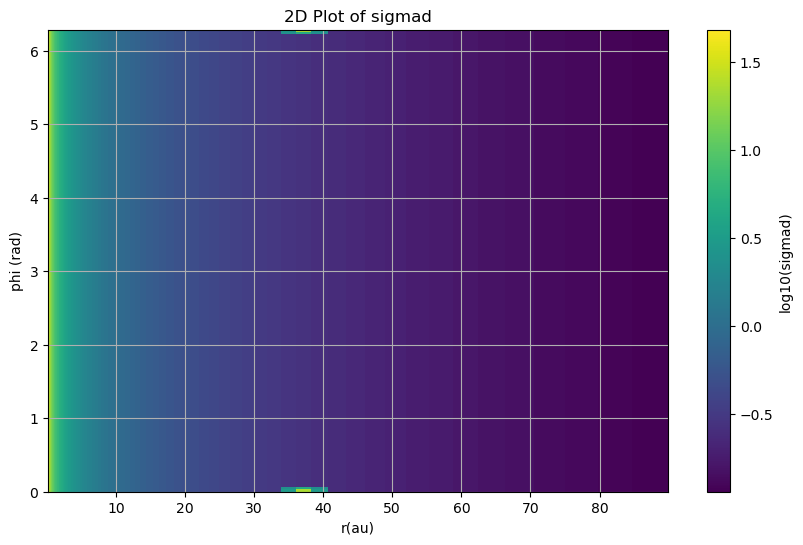

C:\Users\LHEM\AppData\Local\Temp\ipykernel_18236\4143268551.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, np.log(sigmad_slice.T), shading='auto', cmap='viridis')


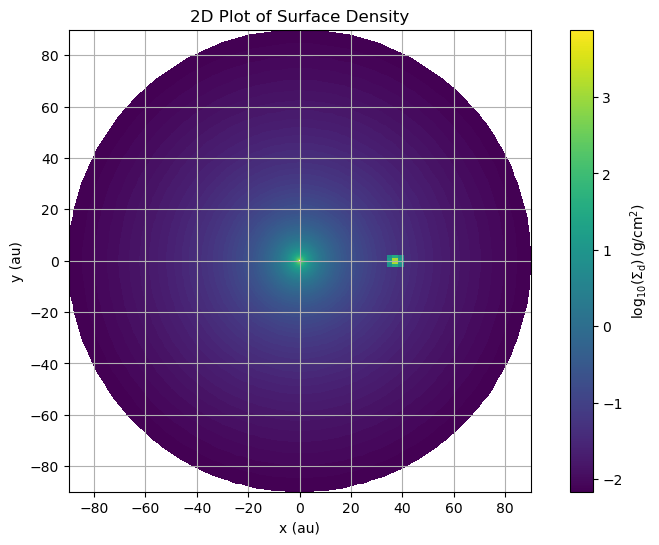

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rr, pp, and sigmad are 3D arrays
# Select the 2D slice where theta is zero (assuming theta is the third dimension)
rr_slice = rr[:, 0, :]
pp_slice = pp[:, 0, :]
sigmad_slice = sigmad[:, 0, :]

print(f'The shape of rr_slice is {np.shape(rr_slice)}')
print(f'The shape of pp_slice is {np.shape(pp_slice)}')
print(f'The shape of sigmad_slice is {np.shape(sigmad_slice)}')


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(rr_slice[:, 0], pp_slice[0, :])

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')


# Create a 2D plot of sigmad vs x, y
plt.figure(figsize=(10, 6))
plt.pcolormesh(rr_slice/au, pp_slice, np.log10(sigmad_slice), shading='auto', cmap='viridis')
plt.colorbar(label='log10(sigmad)')
plt.xlabel('r(au)')
plt.ylabel('phi (rad)')
plt.title('2D Plot of sigmad')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, np.log(sigmad_slice.T), shading='auto', cmap='viridis')
plt.colorbar(label=r'$\log_{10}(\Sigma_{\mathrm{d}}) \, (\mathrm{g/cm^2})$')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Density')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

In [8]:
import numpy as np
# Reference files from radmc3d-2.0/examples/run_ppdisk_simple_1/problem_setup.py

# Make some plots in between to visualize the grid and density distribution

# Import some astronomical constants
from astropy.constants import M_sun, L_sun, R_sun, au, pc, G, M_jup, R_jup
from astropy.units import K, g, cm


# Convert constants to cgs units
au = au.cgs.value     # Astronomical Unit       [cm]
pc = pc.cgs.value     # Parsec                  [cm]
M_sun = M_sun.cgs.value  # Solar mass              [g]
T_sun = 3000      # Solar temperature       [K]
L_sun = L_sun.cgs.value  # Solar luminosity        [erg/s]
R_sun = R_sun.cgs.value  # Solar radius            [cm]
M_jup = M_jup.cgs.value  # Jupiter mass            [g]
R_jup = R_jup.cgs.value  # Jupiter radius          [cm]   




# Define the parameters of the model

    # radmc3d.inp parameter : main settings for RADMC-3D
nphot    = 1000000  #for the thermal monte carto simulation
#multiple CPU cores, may need cluster

    # Grid : defines layout of space

nr       = 100 
ntheta   = 32
nphi     = 200


# Radius for PPD not CPD
# r:  inner CPD (0.2 au to 2.2 au) , gap (2.2 au to 26 au) , outer dust ring (26 au to 90 au)
# (Poblette et al 2022), but doesnt include the inner CPD rim, prob need calculagte truncation radius from star mass
# CPD locates 37.2 au away from star (r = 37.2 )
r_in      = 0.2*au   # 3 times Jupyter radius
r_out     = 90*au 

theta_up  = np.pi*0.5 - 0.7e0  
        # Coordinate array

r_i       = np.logspace(np.log10(r_in),np.log10(r_out),nr+1)  #+1 because it is not counting cell centers, but the walls
theta_i   = np.linspace(theta_up,0.5e0*np.pi,ntheta+1)  # theta goes to pi/2 lets z starts from zero 
phi_i     = np.linspace(0.e0,np.pi*2.e0,nphi+1)

        # Cell center position array
r_c = 0.5*(r_i[0:nr]+r_i[1:nr+1])  # average of the cell wall x-pos and cell wall x+1 pos for each cell in the array
theta_c = 0.5*(theta_i[0:ntheta]+theta_i[1:ntheta+1])
phi_c = 0.5*(phi_i[0:nphi]+phi_i[1:nphi+1])


        # Make the grid
            # takes in the center positions of the cells and returns a 3D matrix of the grid
            # indexing='ij' means that the first two indices of the 3D matrix are the r and theta coordinates
qq       = np.meshgrid(r_c,theta_c,phi_c,indexing='ij')
            # Extract the coordinates (r,theta, z) from the 3D matrix
rr       = qq[0]  # final r coor defined by cell center
tt       = qq[1] # final theta coor defined by cell center, just for defining zr
pp       = qq[2]
zr       = np.pi/2.e0 - qq[1]    # z = pi/2 - theta, essentially frame rotated by 90 degrees, and z is from 0 to 0.7 radians


    # Density: dust values (for each species) for each cell in the grid
                                                                                                                                                             
        # number of dust species
ndustspec = 2


sigmag0  = 1e3               # Sigma gas at 1 AU
sigmad0  = sigmag0 * 0.01    # Sigma dust at 1 AU
fracbig  = 0.99              # Fraction of dust that is the big grain dust
plsig    = -1.0e0            # Powerlaw of the surface density
hr0      = 0.05              # H_p/r at 1 AU
plh      = 0.1               # Powerlaw of flaring
hrbigsett= 0.02              # The big grains are settled a bit more than the small grains
        # dust density function

sigmad   = sigmad0 * (rr/au)**plsig
sigmadsm = sigmad*(1.-fracbig)
sigmadbg = sigmad*fracbig
hhrsm    = hr0 * (rr/au)**plh
hhrbg    = hrbigsett * (rr/au)**plh
hhsm     = hhrsm * rr
hhbg     = hhrbg * rr
rhodsm   = ( sigmadsm / (np.sqrt(2.e0*np.pi)*hhsm) ) * np.exp(-(zr**2/hhrsm**2)/2.e0)
rhodbg   = ( sigmadbg / (np.sqrt(2.e0*np.pi)*hhbg) ) * np.exp(-(zr**2/hhrbg**2)/2.e0)



#CPD parameters
#sigma_g0 =  10**3 #(g/cm**2)   # gas surface density at 1 au
sigmad02 = 0.01*10**3 #(g/cm**2) #g/cm^2 # dust surface density at 1 au
plsig2 = -1.5# power law index for the dust surface density
plh2  = 1.15 # power law index for the dust scale height
hr02 = 0.1
hrbigsett2 =0.05

# Make the dust density model for CPD
#
sigmad2  = sigmad02 * (rr/au)**plsig2
sigmadsm2 = sigmad2*(1.-fracbig)
sigmadbg2 = sigmad2*fracbig
hhrsm2    = hr02 *(rr/au)**plh2
hhrbg2    = hrbigsett2 * (rr/au)**plh2
hhsm2     = hhrsm2 * rr
hhbg2     = hhrbg2 * rr
rhodsm2   = ( sigmadsm2 / (np.sqrt(2.e0*np.pi)*hhsm2) ) * np.exp(-(zr**2/hhrsm2**2)/2.e0)
rhodbg2   = ( sigmadbg2 / (np.sqrt(2.e0*np.pi)*hhbg2) ) * np.exp(-(zr**2/hhrbg2**2)/2.e0)

# Define the radial range for the CPD
r_min = 34.7 * au  # Inner radius of the CPD region
r_max = 39.7 * au  # Outer radius of the CPD region
phi_max = np.arctan(2.5/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max


# Create a mask for the specified range of rr
mask_r = (rr >= r_min) & (rr <= r_max)
mask_phi = (pp >= 0) & (pp <= phi_max) | (pp >= phi_min) & (pp <= 2*np.pi) #or operator

mask = mask_r & mask_phi

# Extract the masked radial values
r_masked = rr[mask]
pp_masked = pp[mask]

# Define the midpoint of the CPD region
r_mid = 37.2*au # Midpoint of the radial range

# Shift the radial array by the midpoint and take the positive values

r_shifted = np.sqrt(r_masked**2 + r_mid**2 - 2*r_masked*r_mid*np.cos(pp_masked))

# Update the density model within the specified range
# Apply the shifted and positive radial values
# ongoing discussion about shape (Sun etal 2024)
sigmad[mask] += sigmad02 * (r_shifted / au) ** plsig2
sigmadsm[mask] = sigmad[mask] * (1. - fracbig)
sigmadbg[mask] = sigmad[mask] * fracbig
hhrsm[mask] += hr02 * (r_shifted / au) ** plh2
hhrbg[mask] += hrbigsett2 * (r_shifted / au) ** plh2
hhsm[mask] = hhrsm[mask] * r_shifted
hhbg[mask] = hhrbg[mask] * r_shifted
rhodsm[mask] = (sigmadsm[mask] / (np.sqrt(2.e0 * np.pi) * hhsm[mask])) * np.exp(-(zr[mask] ** 2 / hhrsm[mask] ** 2) / 2.e0)
rhodbg[mask] = (sigmadbg[mask] / (np.sqrt(2.e0 * np.pi) * hhbg[mask])) * np.exp(-(zr[mask] ** 2 / hhrbg[mask] ** 2) / 2.e0)


